# Bank Churn: Предсказание ухода клиента

## Цель
Предсказать, продолжит ли клиент пользоваться своим аккаунтом или закроет его.

## Модель
Логистическая регрессия (Logistic Regression).

##### Импорт библиотек:

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

##### Загрузка данных

In [36]:
df = pd.read_csv('data.csv')

## Исследовательский анализ данных (EDA)

##### Первичный анализ данных

In [37]:
# Посмотрим первые несколько строк данных
display(df.head())

# Основные статистические показатели
print("Статистики по числовым признакам:")
display(df.describe(include='all'))

# Проверяем наличие пропущенных значений
print("Пропущенные значения:")
display(df.isnull().sum())

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


Статистики по числовым признакам:


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034,165034.000000,165034,165034,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
unique,NaN,NaN,2797,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Hsia,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2456,NaN,94215,93150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,82516.5000,1.569201e+07,NaN,656.454373,NaN,NaN,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,NaN,80.103340,NaN,NaN,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,NaN,597.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,NaN,659.000000,NaN,NaN,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,NaN,710.000000,NaN,NaN,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000


Пропущенные значения:


id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

##### Визуализация данных

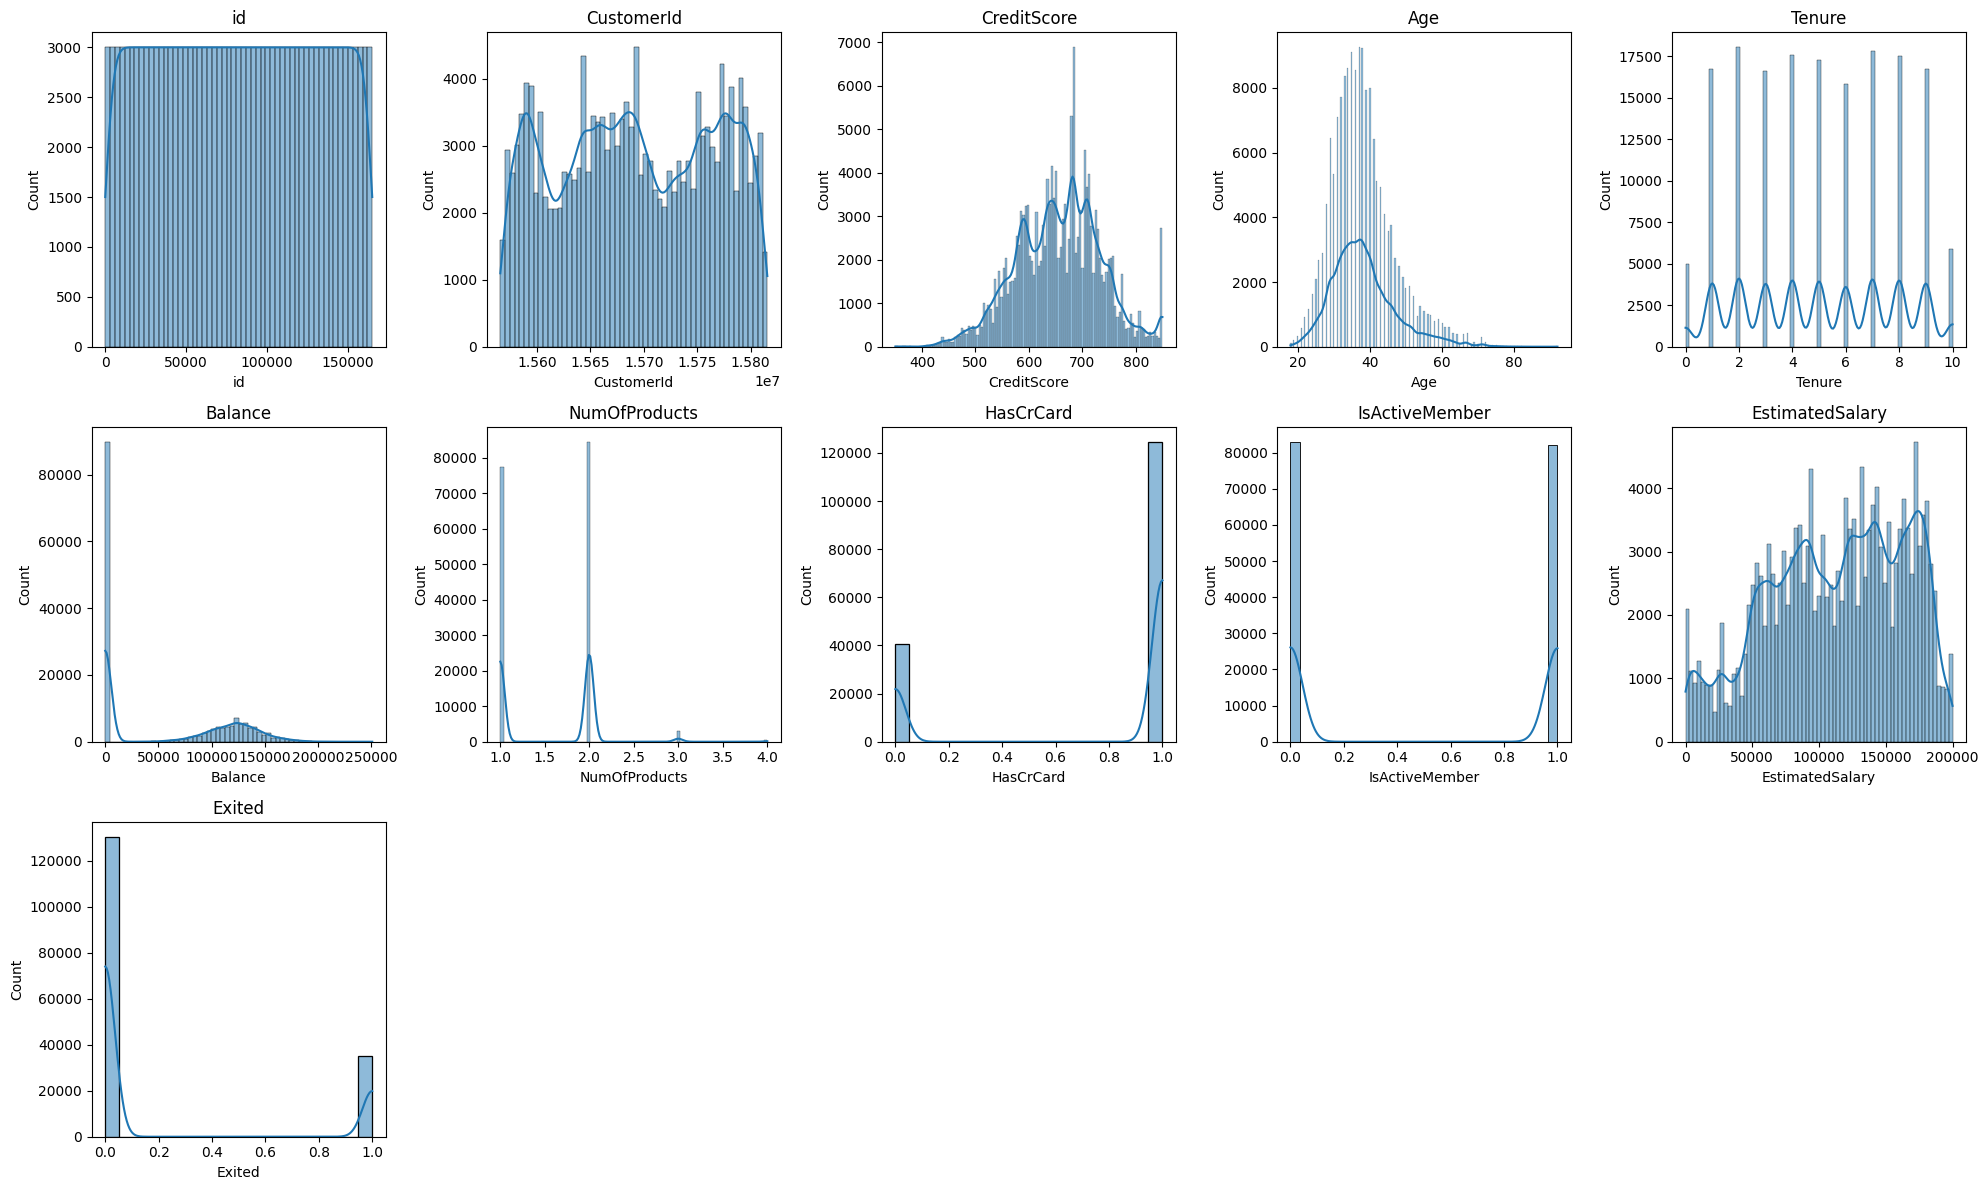

Сводная таблица для Surname:


col_0,count
Surname,
Abazu,1
Abbie,4
Abbott,24
Abdullah,1
Abdulov,12
...,...
Zubarev,7
Zubareva,1
Zuev,19


Сводная таблица для Geography:


col_0,count
Geography,
France,94215
Germany,34606
Spain,36213


Сводная таблица для Gender:


col_0,count
Gender,
Female,71884
Male,93150


In [38]:
# Гистограммы для числовых признаков
num_columns = len(df.select_dtypes(include=np.number).columns)
rows = int(np.ceil(num_columns / 5))  # Количество рядов
cols = min(5, num_columns)            # Количество столбцов

plt.figure(figsize=(20, rows * 4))
for i, col in enumerate(df.select_dtypes(include=np.number).columns):
    plt.subplot(rows, cols, i+1)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Сводные таблицы для категориальных признаков
categorical_cols = df.select_dtypes(exclude=np.number).columns
for col in categorical_cols:
    print(f"Сводная таблица для {col}:")
    display(pd.crosstab(index=df[col], columns="count"))

##### Анализ целевой переменной

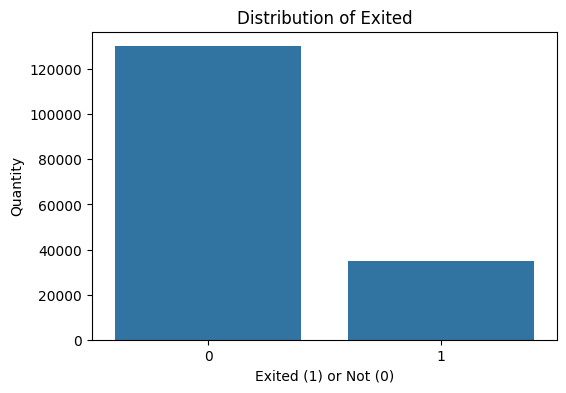

In [39]:
# Визуализация распределения целевой переменной 'Exited'
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Exited')
plt.title('Distribution of Exited')
plt.xlabel('Exited (1) or Not (0)')
plt.ylabel('Quantity')
plt.show()

##### Анализ категориальных признаков

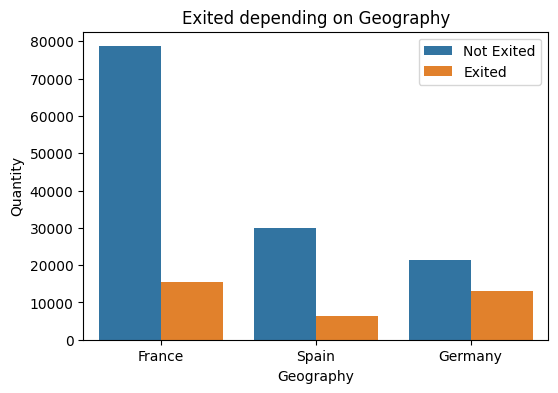

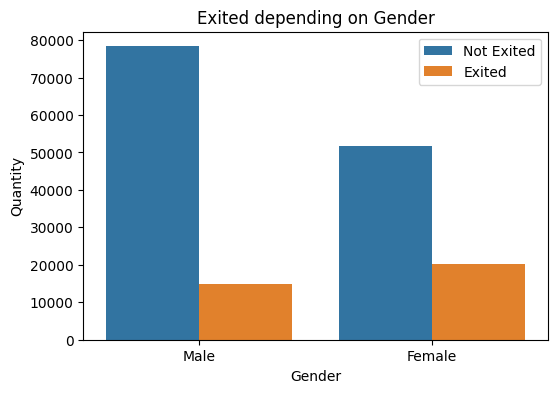

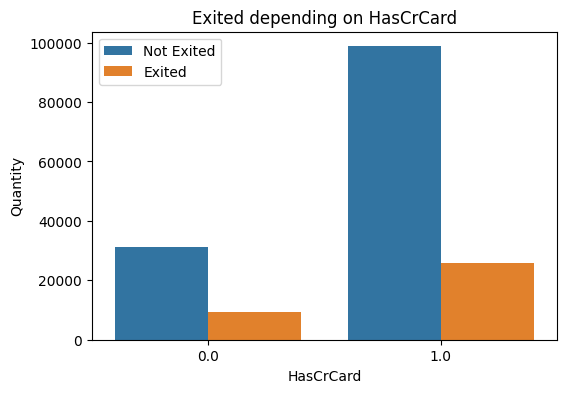

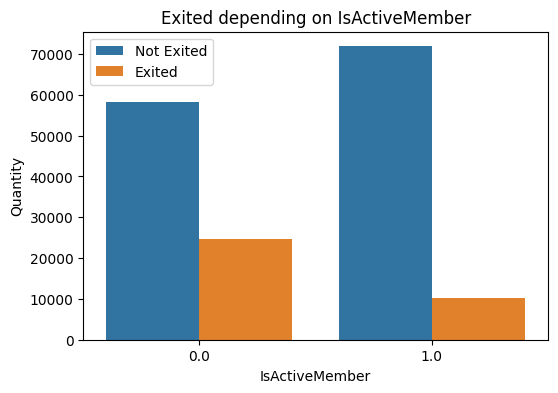

In [40]:
# Анализ категориальных признаков и их влияния на уход клиента
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
# Цикл по категориальным признакам для построения графиков
for feature in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=feature, hue='Exited')
    plt.title(f'Exited depending on {feature}')
    plt.xlabel(feature)
    plt.ylabel('Quantity')
    plt.legend(['Not Exited', 'Exited'])
    plt.show()

##### Анализ числовых признаков

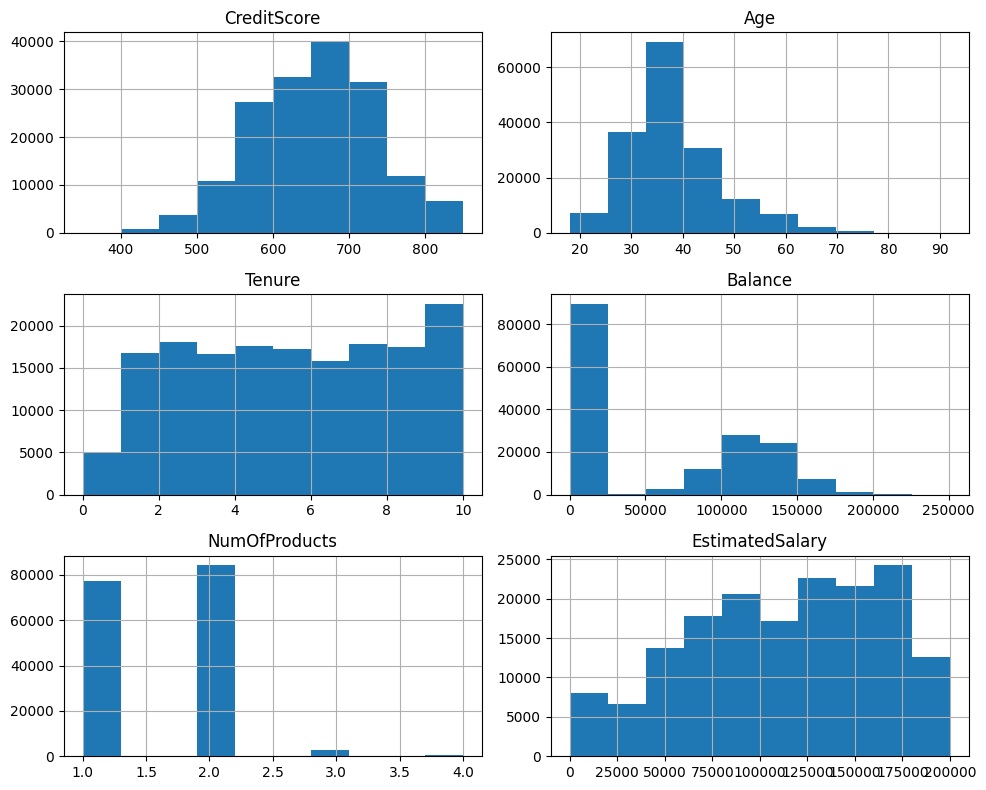

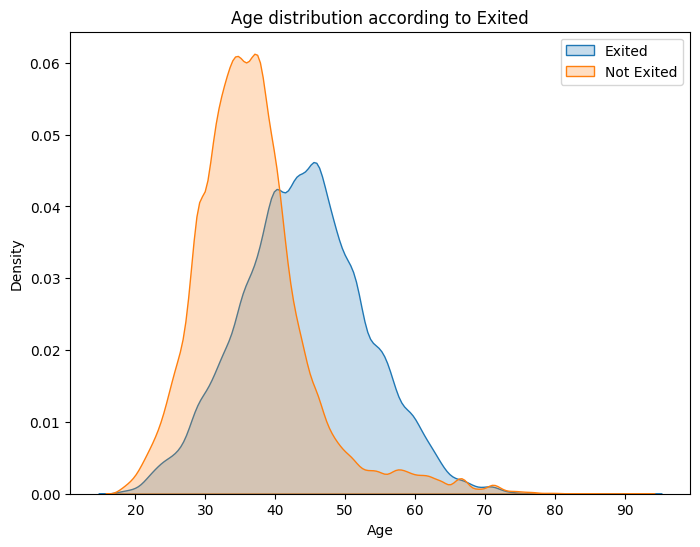

In [41]:
# Анализ распределения числовых признаков
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
# Построение гистограмм для всех числовых признаков
df[numerical_features].hist(figsize=(10,8))
plt.tight_layout()
plt.show()

# Визуализация распределения возраста по группам ушедших и оставшихся клиентов
plt.figure(figsize=(8,6))
# Построение графика плотности для возраста ушедших клиентов
sns.kdeplot(df[df['Exited']==1]['Age'].dropna(), fill=True, label='Exited')
# Построение графика плотности для возраста оставшихся клиентов
sns.kdeplot(df[df['Exited']==0]['Age'].dropna(), fill=True, label='Not Exited')
plt.title('Age distribution according to Exited')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

##### Корреляционная матрица числовых признаков

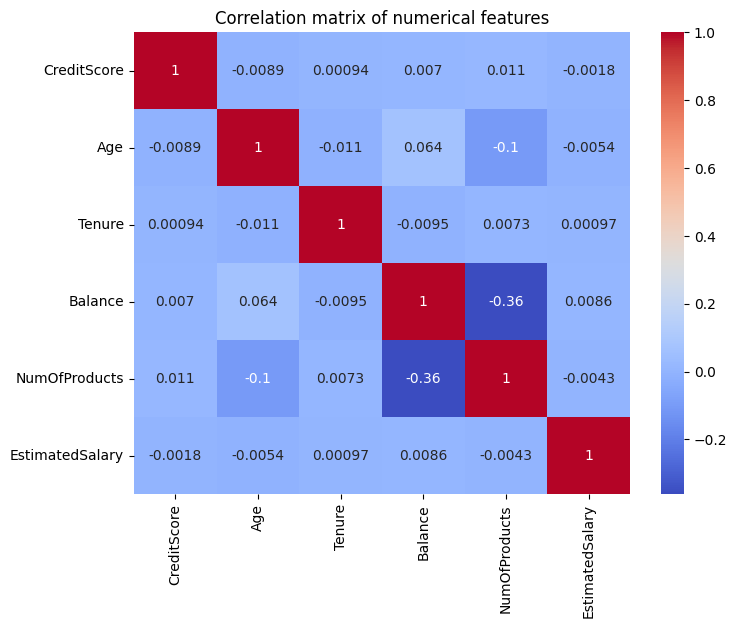

In [42]:
# Корреляционная матрица для числовых признаков
corr_matrix = df[numerical_features].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix of numerical features')
plt.show()

## Предварительная обработка данных

##### Удаление ненужных признаков

In [43]:
# Удаление ненужных признаков
df = df.drop(columns=['CustomerId', 'Surname'])

##### Кодирование категориальных переменных

In [44]:
# Кодирование категориальных переменных
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

##### Масштабирование данных

In [45]:
# Масштабирование данных
scaler = StandardScaler()
X = df.drop(columns=['Exited'])
y = df['Exited']
X_scaled = scaler.fit_transform(X)

##### Балансировка классов с использованием SMOTE

In [48]:
# Балансировка классов с использованием SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

#### Разделение данных на тренировочный и тестовый наборы

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

## Построение и оценка модели



In [50]:
class LogisticRegression:
    def __init__(self, learning_rate=0.001, max_iter=10000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.coef_ = None
        self.intercept_ = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, h, y):
        return (-y * np.log(h + 1e-15) - (1 - y) * np.log(1 - h + 1e-15)).mean()

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.coef_ = np.zeros(n_features)
        self.intercept_ = 0

        for _ in range(self.max_iter):
            linear_combination = np.dot(X, self.coef_) + self.intercept_
            probabilities = self.sigmoid(linear_combination)
            cost = self.cost_function(probabilities, y)

            dW = -(1 / n_samples) * np.dot(X.T, (probabilities - y))
            db = -(1 / n_samples) * np.sum(probabilities - y)

            self.coef_ -= self.learning_rate * dW
            self.intercept_ -= self.learning_rate * db

    def predict_proba(self, X):
        linear_combination = np.dot(X, self.coef_) + self.intercept_
        probabilities = self.sigmoid(linear_combination)
        return probabilities

    def predict(self, X, threshold=0.5):
        probabilities = self.predict_proba(X)
        predictions = (probabilities >= threshold).astype(int)
        return predictions

##### Обучение модели

In [51]:
model = LogisticRegression(learning_rate=0.005, max_iter=10000)
model.fit(X_train, y_train)

##### Прогнозы на тестовом наборе

In [52]:
y_pred = model.predict(X_test)

##### Оценка точности модели

In [53]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели: {accuracy:.2f}")

# Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
print("Матрица ошибок:")
display(cm)

# Отчет классификации
print("Отчёт классификации:")
cr = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(cr).T
display(df)

Точность модели: 0.30
Матрица ошибок:


array([[10958, 15050],
       [21479,  4559]])

Отчёт классификации:


,precision,recall,f1-score,support
0,0.337824,0.421332,0.374985,26008.00000
1,0.232495,0.175090,0.199750,26038.00000
accuracy,0.298140,0.298140,0.298140,0.29814
macro avg,0.285160,0.298211,0.287368,52046.00000
weighted avg,0.285129,0.298140,0.287317,52046.00000


# Прогнозирование ухода клиентов из банка
## Метод логистической регрессии
Логистическая регрессия является одним из наиболее популярных методов классификации в области машинного обучения. Этот метод широко применяется для решения задач бинарной классификации, например, для определения вероятности события.

### Формулировка задачи
Задача состоит в том, чтобы предсказать вероятность определенного события на основе набора характеристик. В нашем случае, это задача предсказания вероятности того, что клиент продолжит пользоваться своим аккаунтом или закроет его на основе таких показателей, как возраст, кредитный рейтинг, баланс на счете, количество продуктов банка, которыми пользуется клиент, и другие факторы.

### Линейная комбинация признаков
Логистическая регрессия основана на идее, что вероятность события пропорциональна сумме взвешенных характеристик. Это выражается формулой:

$$
P(y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n)}}
$$

Где:
- $P(y=1|X)$ — вероятность события (уход клиента);
- $\beta_0$ — свободный член (смещение);
- $\beta_1, \beta_2, ..., \beta_n$ — коэффициенты, которые определяют вклад признаков $X_1, X_2, ..., X_n$ в предсказание.

### Функция сигмоида
Для преобразования линейной комбинации в вероятность используется функция сигмоида:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Сигмоидная функция сжимает диапазон значений от 0 до 1, что делает ее удобной для интерпретации вероятности.

### Оптимизация параметров
Параметры модели (весы и смещение) оптимизируются с помощью метода градиентного спуска. Каждый шаг алгоритма обновляет параметры таким образом, чтобы минимизировать ошибку. Логистическая функция возвращает значение между 0 и 1, которое интерпретируется как вероятность события.

## Результаты выполнения задачи
### EDA
- Данные содержат информацию о клиентах банка, включая их возраст, кредитный рейтинг, баланс на счете, количество продуктов банка, которыми пользуется клиент, и другие факторы.
- Были выявлены пропущенные значения, которые были обработаны.
- Проведена визуализация распределения признаков и анализ категориальных признаков.

### Предварительная обработка данных
- Категориальные признаки были закодированы.
- Признаки были нормализованы для улучшения качества модели.
- Данные были разделены на обучающий и тестовый наборы.

### Модель логистической регрессии
- Модель была обучена на обучающем наборе данных.
- На тестовом наборе данных была достигнута точность 0.30.

## Заключение
В результате выполнения задания был проведен исследовательский анализ данных, выполнена предварительная обработка данных, построена и оценена модель логистической регрессии для предсказания вероятности того, что клиент продолжит пользоваться своим аккаунтом или закроет его.